<a href="https://colab.research.google.com/github/spindlerdouglas/opencv-matplotlib/blob/main/Filters_and_image_manipulation_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

# alternate between the different images by commenting/uncommenting out the lines below
# img = cv2.imread("drive/MyDrive/DSC-4905-resized.JPG", -1)
img = cv2.imread("drive/MyDrive/tromso.jpg", cv2.IMREAD_COLOR)

## Image resizing

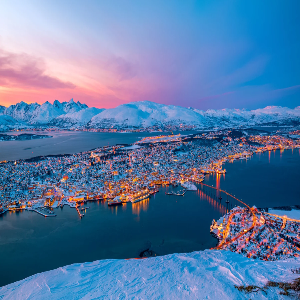

In [409]:
# resizing with absolute values
img_resized_absolute = cv2.resize(img, (300, 300), interpolation=cv2.INTER_LINEAR)
cv2_imshow(img_resized_absolute)

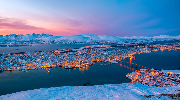

In [410]:
# resizing with ratio
img_resized_ratio = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_LINEAR)
cv2_imshow(img_resized_ratio)

## Converting image formats

For converting from one format to another, we simply use method _imwrite_ and specify the filename with the desired format. In this example, we take an original .jpg file and copy it to a new .png file.

In [411]:
# convert from .jpg to .png
cv2.imwrite('new_image.png', img_resized_ratio)

True

## Cropping

Simple slicing operations in the image.

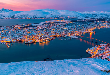

In [412]:
image = cv2.imread('new_image.png', -1)
cropped = image[25:180,40:150, :]
cv2_imshow(cropped)

## Filters

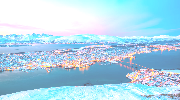

In [413]:
filter = np.ones(img_resized_ratio.shape, dtype=np.uint8) * 100
filtered = cv2.add(img_resized_ratio, filter)
cv2_imshow(filtered)

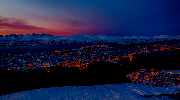

In [414]:
filtered = cv2.subtract(img_resized_ratio, filter)
cv2_imshow(filtered)

## Blurring

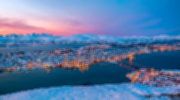

(100, 180, 3)


In [415]:
# kernel = np.array([[1/9, 1/9, 1/9,],
#                    [1/9, 1/9, 1/9,],
#                    [1/9, 1/9, 1/9,]])

kernel_blur = np.ones((3,3), np.float32) / 9

kernel_image = cv2.filter2D(image, -1, kernel_blur)

cv2_imshow(kernel_image)
print(image.shape)

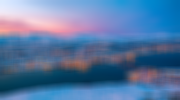

(100, 180, 3)


In [416]:
# increasing the convolution kernel parameters produces a stronger blur effect
kernel_blur = np.ones((9,9), np.float32) / 81
kernel_image = cv2.filter2D(image, -1, kernel_blur)
cv2_imshow(kernel_image)
print(image.shape)


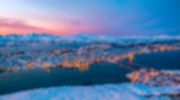

In [417]:
# using a Gaussian blur
gaussian_blurred = cv2.GaussianBlur(image, (5,5), 0)
cv2_imshow(gaussian_blurred)

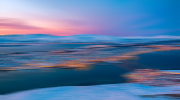

In [418]:
# using a motion blur
kernel_motion_blur = np.zeros((15,15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

motion_blurred = cv2.filter2D(image, -1, kernel_motion_blur)

cv2_imshow(motion_blurred)

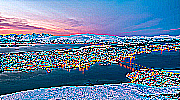

In [419]:
# sharpening

kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2_imshow(sharpened)

## Translation and Rotation

Both use warp affine transformations.
* Translation is based on a vector addition
* Rotation is based on a rotation matrix which defines the center, angle and scale to be applied. To rotate the image 180 degrees from its center, we take the width and height and divide them by 2.

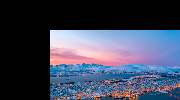

In [420]:
# translation
height, width = image.shape[:2]
M = np.float32([[1, 0, 50], [0, 1, 30]])
translated_image = cv2.warpAffine(image, M, (width, height))  
cv2_imshow(translated_image)

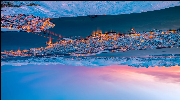

In [421]:
height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
rotated_image = cv2.warpAffine(image, M, (width, height))
cv2_imshow(rotated_image)

## Bitwise operations

These operations are used for applying a mask over an image.
* A bitwise _AND_ operation returns _true_ when the values in both the original image and the mask are not zero. With this, we define a mask as an image with a dark background (value 0) with the mask itself containing any non-0 value. Any non-0 value from the original image is kept only in the positions where the mask is applied. In summary, we use it for darkening out all values from the original image except for the ones overlapping with the mask. Method np.invert can be used for inverting the mask.


* A bitwise _OR_ operation returns _true_ when there is a non-0 value in either the original value or the mask. With this, we define a mask as an image with a dark background (value 0) with the mask itself containing any non-0 value. Any non-0 value from the original image is kept. In summary, we use it for keeping the original image untouched and overlaying it with the mask. When both values are truthy, the highest one is taken.


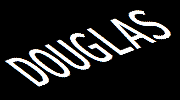

In [422]:
mask = cv2.imread('drive/MyDrive/name_mask.png')
# mask = cv2.resize(mask, (200,225), interpolation=cv2.INTER_LINEAR)
mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)
# mask = np.invert(mask)
cv2_imshow(mask)

In [423]:
mask.shape

(100, 180, 3)

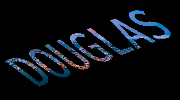

In [424]:
result_bitwise_and = cv2.bitwise_and(image, mask)
cv2_imshow(result_bitwise_and)

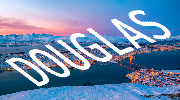

In [425]:
result_bitwise_or = cv2.bitwise_or(image, mask)
cv2_imshow(result_bitwise_or)

In [426]:
# example with simple array values
array1 = np.array([0, 1, 15, 250, 0], dtype=np.uint8)
array_mask = np.array([255, 255, 0, 255, 0], dtype=np.uint8)
result = cv2.bitwise_and(array1, array_mask)
# result is [0, 1, 0, 250, 0]
print("Bitwise AND:", result) 

# result is [255, 255, 15, 255, 0]
result = cv2.bitwise_or(array1, array_mask)
print("Bitwise OR:",result)

Bitwise AND: [[  0]
 [  1]
 [  0]
 [250]
 [  0]]
Bitwise OR: [[255]
 [255]
 [ 15]
 [255]
 [  0]]
